In [63]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import numpy as np
import seaborn as sns
import tensorflow as tf
#installed necessary libraries and imported them


In [64]:
df = pd.read_csv(r"C:\Users\aduka\Downloads\AdaniENT (5).csv")
#Historical prices of Adani Ent. over the last 5 years

In [65]:
df.head()

,Date,Open,High,Low,Close,WAP,No. of Shares,No. of Trades,Total Turnover,Deliverable Quantity,% Deli. Qty to Traded Qty,Spread H-L,Spread C-O
0,20-07-2018,152.00,164.95,149.80,163.05,157.21,2845031,15663,447267480,107526.0,3.78,15.15,11.05
1,23-07-2018,162.50,172.35,159.00,171.10,164.76,2100895,11256,346145584,79623.0,3.79,13.35,8.60
2,24-07-2018,171.00,188.10,165.15,186.15,175.46,4181190,22006,733632029,156604.0,3.75,22.95,15.15
3,25-07-2018,185.15,205.05,184.00,200.35,196.47,4416275,27865,867675870,178844.0,4.05,21.05,15.20
4,26-07-2018,193.80,201.00,189.25,197.50,195.56,3814664,23666,746014412,128811.0,3.38,11.75,3.70


In [66]:
df.tail()

,Date,Open,High,Low,Close,WAP,No. of Shares,No. of Trades,Total Turnover,Deliverable Quantity,% Deli. Qty to Traded Qty,Spread H-L,Spread C-O
1232,14-07-2023,2378.50,2384.50,2340.00,2376.85,2362.92,150909,9611,356585640,41400.0,27.43,44.50,-1.65
1233,17-07-2023,2390.05,2459.00,2390.05,2408.30,2425.81,349216,20976,847131462,109438.0,31.34,68.95,18.25
1234,18-07-2023,2412.00,2510.00,2404.80,2416.20,2445.80,335742,16845,821158176,44119.0,13.14,105.20,4.20
1235,19-07-2023,2432.00,2441.85,2416.70,2423.70,2428.20,79392,5073,192779490,22484.0,28.32,25.15,-8.30
1236,20-07-2023,2423.80,2433.00,2400.00,2419.55,2420.02,78449,4934,189848047,12025.0,15.33,33.00,-4.25


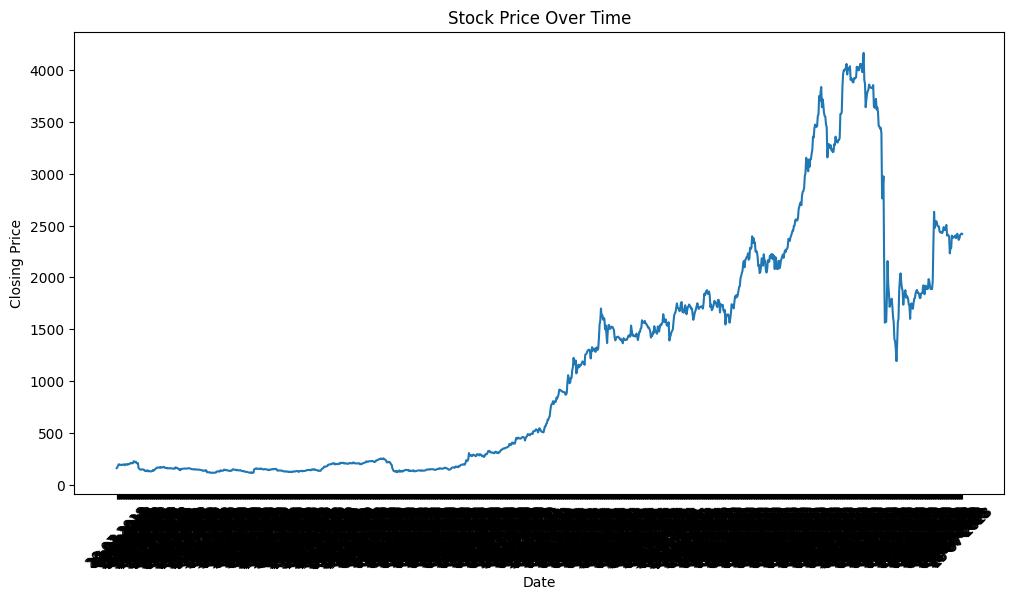

In [67]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Date', y='Close')
plt.title('Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.xticks(rotation=45)   #to avoid overlapping and improve readability if the date labels are long.
plt.show()

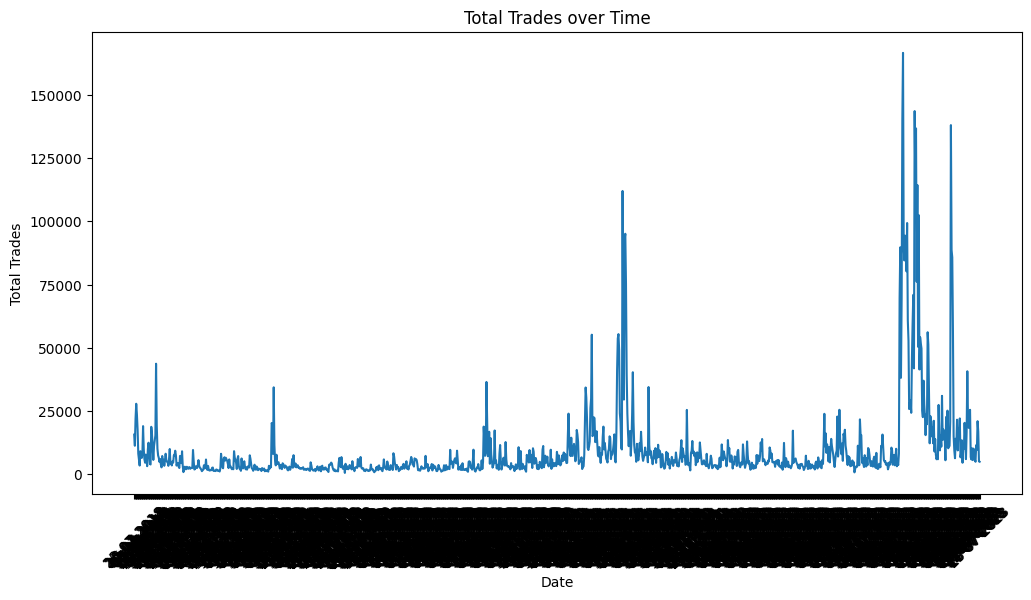

In [68]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Date', y='No. of Trades')
plt.title('Total Trades over Time')
plt.xlabel('Date')
plt.ylabel('Total Trades')
plt.xticks(rotation=45)
plt.show()

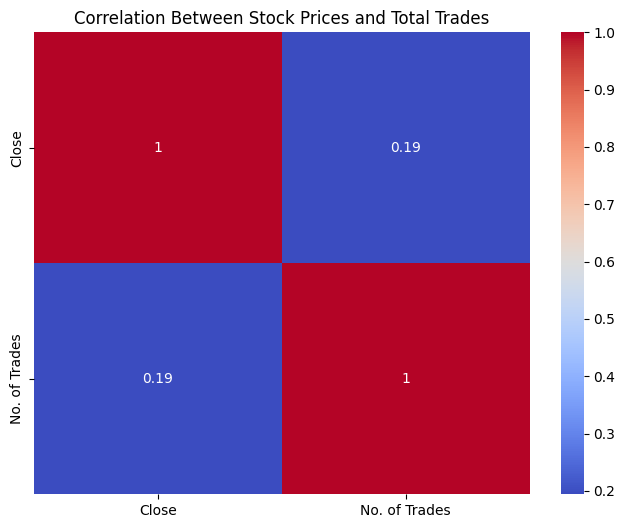

In [69]:
# Assuming 'Close' and 'Total Trades' are columns in the DataFrame df
correlation_matrix = df[['Close', 'No. of Trades']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Between Stock Prices and Total Trades')
plt.show()

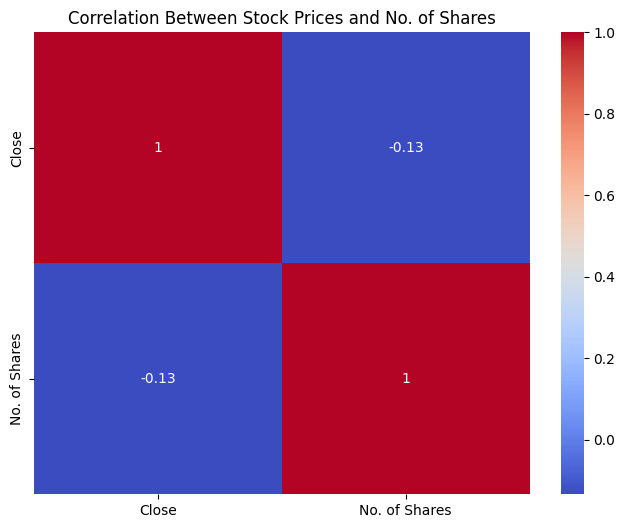

In [70]:
correlation_matrix = df[['Close', 'No. of Shares']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Between Stock Prices and No. of Shares')
plt.show()

In [32]:
df1=df.reset_index()['Close']

In [33]:
df1

0        163.05
1        171.10
2        186.15
3        200.35
4        197.50
         ...   
1232    2376.85
1233    2408.30
1234    2416.20
1235    2423.70
1236    2419.55
Name: Close, Length: 1237, dtype: float64

In [35]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [36]:
df1

array([[0.0113781 ],
       [0.0133671 ],
       [0.01708568],
       ...,
       [0.56808944],
       [0.56994255],
       [0.56891717]])

In [37]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.60)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [38]:
training_size,test_size


(742, 495)

In [39]:
#Data preprocessing
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)

In [40]:
time_step = 75
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [41]:
print(X_train.shape), print(y_train.shape)
#(Number of records,time_step)

(666, 75)
(666,)


(None, None)

In [42]:
print(X_test.shape), print(ytest.shape)

(419, 75)
(419,)


(None, None)

In [43]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [44]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(75, 1)))
model.add(LSTM(50))
model.add(Dense(1))


optimizer = Adam(learning_rate=0.001)
model.compile(loss='mean_squared_error', optimizer=optimizer)



model.summary()





Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_17 (LSTM)              (None, 75, 50)            10400     
                                                                 
 lstm_18 (LSTM)              (None, 50)                20200     
                                                                 
 dense_6 (Dense)             (None, 1)                 51        
                                                                 
Total params: 30651 (119.73 KB)
Trainable params: 30651 (119.73 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [45]:
model.fit(X_train, y_train, validation_data=(X_test, ytest), epochs=100, batch_size=64, verbose=1)


Epoch 1/100
11/11 [==============================] - 7s 211ms/step - loss: 0.0043 - val_loss: 0.0051
Epoch 2/100
11/11 [==============================] - 1s 103ms/step - loss: 5.3552e-04 - val_loss: 0.0087
Epoch 3/100
11/11 [==============================] - 1s 106ms/step - loss: 2.3555e-04 - val_loss: 0.0050
Epoch 4/100
11/11 [==============================] - 1s 106ms/step - loss: 1.8068e-04 - val_loss: 0.0037
Epoch 5/100
11/11 [==============================] - 1s 105ms/step - loss: 1.3296e-04 - val_loss: 0.0034
Epoch 6/100
11/11 [==============================] - 1s 105ms/step - loss: 1.0307e-04 - val_loss: 0.0042
Epoch 7/100
11/11 [==============================] - 1s 104ms/step - loss: 1.1276e-04 - val_loss: 0.0032
Epoch 8/100
11/11 [==============================] - 1s 104ms/step - loss: 1.0811e-04 - val_loss: 0.0033
Epoch 9/100
11/11 [==============================] - 1s 107ms/step - loss: 9.8088e-05 - val_loss: 0.0035
Epoch 10/100
11/11 [==============================] - 1s 10

11/11 [==============================] - 1s 110ms/step - loss: 5.6664e-05 - val_loss: 0.0086
Epoch 79/100
11/11 [==============================] - 1s 106ms/step - loss: 5.2752e-05 - val_loss: 0.0083
Epoch 80/100
11/11 [==============================] - 1s 105ms/step - loss: 5.6444e-05 - val_loss: 0.0096
Epoch 81/100
11/11 [==============================] - 1s 108ms/step - loss: 5.4619e-05 - val_loss: 0.0094
Epoch 82/100
11/11 [==============================] - 1s 104ms/step - loss: 5.1995e-05 - val_loss: 0.0080
Epoch 83/100
11/11 [==============================] - 1s 104ms/step - loss: 5.1498e-05 - val_loss: 0.0077
Epoch 84/100
11/11 [==============================] - 1s 105ms/step - loss: 5.4705e-05 - val_loss: 0.0098
Epoch 85/100
11/11 [==============================] - 1s 104ms/step - loss: 4.9721e-05 - val_loss: 0.0102
Epoch 86/100
11/11 [==============================] - 1s 104ms/step - loss: 4.9186e-05 - val_loss: 0.0089
Epoch 87/100
11/11 [==============================] - 1s 10

In [46]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)


14/14 [==============================] - 0s 22ms/step


In [47]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

0.0067442672415815325

In [48]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

0.09690905506517188

In [49]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)


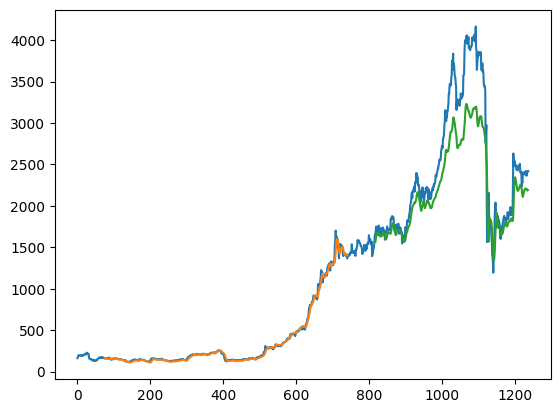

In [50]:
look_back=75
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [55]:
len(test_data)

495

In [56]:
x_input=test_data[345:].reshape(1,-1)#Predicting with the help of previous 100 days
x_input.shape

(1, 150)

In [57]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [58]:
from numpy import array

lst_output=[]
n_steps=150
i=0
while(i<10):
    
    if(len(temp_input)>150):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.5160238]
151
1 day input [0.97335228 0.97005374 0.95425289 0.9795046  1.         0.93543764
 0.92657978 0.87070233 0.88915931 0.9025017  0.90924702 0.91247143
 0.9246649  0.92005683 0.91749954 0.91680771 0.91719069 0.91601705
 0.92339243 0.87224659 0.86928161 0.87178949 0.89058002 0.86527889
 0.87018346 0.85943542 0.82638829 0.82510347 0.81969238 0.8217308
 0.8086602  0.65356724 0.68231515 0.7061585  0.49705355 0.35769967
 0.36251776 0.3596022  0.41645562 0.50445364 0.44729137 0.42753722
 0.39546606 0.40355797 0.41051331 0.41492371 0.3965038  0.37125208
 0.35861387 0.31820372 0.31295324 0.29594169 0.26615603 0.3081228
 0.35766261 0.36807709 0.43544382 0.46101674 0.47505096 0.45366607
 0.43966891 0.4340231  0.4004571  0.42542467 0.42636358 0.43490024
 0.41709803 0.42182964 0.41934647 0.41400951 0.40114893 0.39688677
 0.36680462 0.40142072 0.40348385 0.39546606 0.39061091 0.40421274
 0.41517079 0.4164062  0.42752486 0.43314596 0.43543147 0.42831552
 0.428995   0.42642535 0.41641856 0.

6 day output [[0.43640298]]
7 day input [0.92657978 0.87070233 0.88915931 0.9025017  0.90924702 0.91247143
 0.9246649  0.92005683 0.91749954 0.91680771 0.91719069 0.91601705
 0.92339243 0.87224659 0.86928161 0.87178949 0.89058002 0.86527889
 0.87018346 0.85943542 0.82638829 0.82510347 0.81969238 0.8217308
 0.8086602  0.65356724 0.68231515 0.7061585  0.49705355 0.35769967
 0.36251776 0.3596022  0.41645562 0.50445364 0.44729137 0.42753722
 0.39546606 0.40355797 0.41051331 0.41492371 0.3965038  0.37125208
 0.35861387 0.31820372 0.31295324 0.29594169 0.26615603 0.3081228
 0.35766261 0.36807709 0.43544382 0.46101674 0.47505096 0.45366607
 0.43966891 0.4340231  0.4004571  0.42542467 0.42636358 0.43490024
 0.41709803 0.42182964 0.41934647 0.41400951 0.40114893 0.39688677
 0.36680462 0.40142072 0.40348385 0.39546606 0.39061091 0.40421274
 0.41517079 0.4164062  0.42752486 0.43314596 0.43543147 0.42831552
 0.428995   0.42642535 0.41641856 0.4164062  0.42706776 0.42769782
 0.42884675 0.44645129 0

In [59]:
day_new=np.arange(1,151)
day_pred=np.arange(151,161)
import matplotlib.pyplot as plt
len(df1)

1237

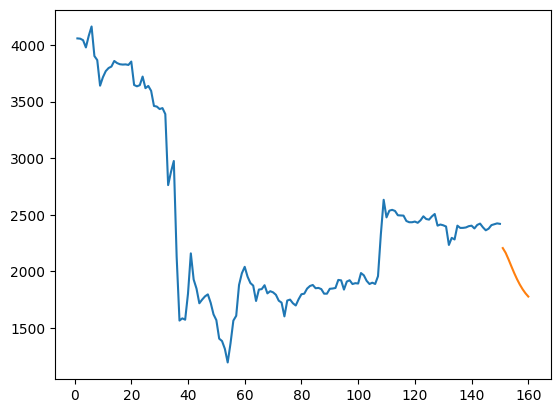

In [60]:
plt.plot(day_new,scaler.inverse_transform(df1[1087:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

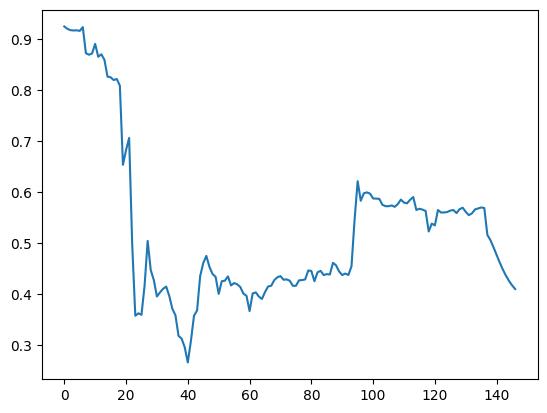

In [61]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1100:])